<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Semana_1_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Procesamiento de Datos
- Fernando Barajas Ramírez
- Matrícula: 2085375
- Github: https://github.com/ferbarajas/ProcesamientoFCFM

Instrucciones:

Utilicen la extracción de palabras clave, stopwords, lematización, y stemming para hacer n preprocesamiento de la información. Utilizar gráficos adecuados para representar la información, y describir de manera general cual puede ser el propósito de la base de datos. (Conclusiones de lo que se puede hacer con los datos recopilados).

In [43]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs

Se toma una base de datos proveniente del sitio Kaggle sobre [Mitos de Vacunas](https://www.kaggle.com/datasets/gpreda/reddit-vaccine-myths). Se obtiene de este conjunto de datos un archivo .csv del cual se extrae la columna de comentarios a un archivo de texto. Este archivo se lee a continuación:

In [44]:
data = codecs.open("vaccine_myths.txt", 'r', 'utf-8')
print('Done!')

Done!


A partir del texto importado, se utiliza la biblioteca de Beautiful Soup para formatear el texto:

In [45]:
soup = BeautifulSoup(data)
text = soup.get_text()
print(text[1000:12000])

 statement is incorrect.
I didn't say thimerosal is mercury. I said thimerosal contains mercury. You're not disagreeing with me. Again, I can't respond if you're not tracking the conversation. We won't get anywhere if you're not even willing to put your own shoes on...
Doctors recommend vaccines for whatever you're most at risk for considering the area you live in. 
"I'm saying that even if you live away from people, you can still get diseases from plants / funghi. Things like Malaria, Dengue and JEV can be gotten from animals. 

And if you're on Reddit, you got some piece of technology. This is pretty silly. :P"
"Kind of hard to avoid exposure unless you abandon being in contact with people completely - and even then, not all diseases that you can vaccinate against come from humans. 

It's not possible to (safely) avoid exposure."
Herd immunity to me is a delegation of one's responsibility of his wellbeing to others. That's basically what it is; regardless if a drug works or not. And 

Se remueven los URLs del texto, ya que son comentarios de un foro en línea, y es algo constante en el texto revisado. Tambien se quitan los numeros:

In [46]:
import re
# Remover hipervinculos (URLs)
text = re.sub(r"https?://\S+", "", text)
print(text)

# Se remueven los numeros tambien
text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)







Your OP. It's not a myth. Only one vaccine contains it and you can get it without it. So your OP is pointless flex. 

Because Anti-Vaxxers have no sense
What do you mean by "your OP". I am fairly new to reddit.
When they say there's no thimerasol, they mean in the childhood schedule. That IS a fact. 
The "myth" you're debunking is in regards to the childhood schedule. ZERO OF THOSE VACCINES CONTAIN IT.  You're being a pedantic fuck for no reason. 
You'll have to read it again because I didn't say that, the CDC did. You say one flu vaccine but the CDC says multiple. Check the CDC link. To paraphrase, "It's out of most single dose and in most multi-dose." That's more than one. I can't keep responding to people who won't even read what they're disagreeing with...
Nope. I didn't say anything about childhood vaccines in my OP. The myth, as I stated plainly, is "Vaccines do not contain mercury." They do contain mercury. Not all, but some, so the statement is incorrect.
I didn't say thi

Se utiliza el Natural Language Toolkit (NLTK), particularmente el tokenizador para separar las lineas de los archivos en las palabras individuales:

In [47]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)
print(tokens[:100])

['Your', 'OP', 'It', 's', 'not', 'a', 'myth', 'Only', 'one', 'vaccine', 'contains', 'it', 'and', 'you', 'can', 'get', 'it', 'without', 'it', 'So', 'your', 'OP', 'is', 'pointless', 'flex', 'Because', 'Anti', 'Vaxxers', 'have', 'no', 'sense', 'What', 'do', 'you', 'mean', 'by', 'your', 'OP', 'I', 'am', 'fairly', 'new', 'to', 'reddit', 'When', 'they', 'say', 'there', 's', 'no', 'thimerasol', 'they', 'mean', 'in', 'the', 'childhood', 'schedule', 'That', 'IS', 'a', 'fact', 'The', 'myth', 'you', 're', 'debunking', 'is', 'in', 'regards', 'to', 'the', 'childhood', 'schedule', 'ZERO', 'OF', 'THOSE', 'VACCINES', 'CONTAIN', 'IT', 'You', 're', 'being', 'a', 'pedantic', 'fuck', 'for', 'no', 'reason', 'You', 'll', 'have', 'to', 'read', 'it', 'again', 'because', 'I', 'didn', 't', 'say']


In [48]:
# Convertir todas las palabras tokenizadas a minusculas
words = [word.lower() for word in tokens]
print(words[:100])

['your', 'op', 'it', 's', 'not', 'a', 'myth', 'only', 'one', 'vaccine', 'contains', 'it', 'and', 'you', 'can', 'get', 'it', 'without', 'it', 'so', 'your', 'op', 'is', 'pointless', 'flex', 'because', 'anti', 'vaxxers', 'have', 'no', 'sense', 'what', 'do', 'you', 'mean', 'by', 'your', 'op', 'i', 'am', 'fairly', 'new', 'to', 'reddit', 'when', 'they', 'say', 'there', 's', 'no', 'thimerasol', 'they', 'mean', 'in', 'the', 'childhood', 'schedule', 'that', 'is', 'a', 'fact', 'the', 'myth', 'you', 're', 'debunking', 'is', 'in', 'regards', 'to', 'the', 'childhood', 'schedule', 'zero', 'of', 'those', 'vaccines', 'contain', 'it', 'you', 're', 'being', 'a', 'pedantic', 'fuck', 'for', 'no', 'reason', 'you', 'll', 'have', 'to', 'read', 'it', 'again', 'because', 'i', 'didn', 't', 'say']


In [49]:
# Descargar stopwords
nltk.download('stopwords')
# importar sotpwords
sw = nltk.corpus.stopwords.words('english')
# Se agregan palabras que no aportan informacion adicional al análisis
newStopWords = ['vaccine','vaccines','https','â','www','com','people','vaccinated','vaccination','like','one','get','first','make','also','donâ','iâ','itâ','us',
                'go','de','1','2','got','yes','en','el','que','para','una','es','por','la','los','000']
sw.extend(newStopWords)

print(sw[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shney\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
# remover stopwords de las palabras tokenizadas
words_ns = [word for word in words if word not in sw]
print(words_ns[:100])

['op', 'myth', 'contains', 'without', 'op', 'pointless', 'flex', 'anti', 'vaxxers', 'sense', 'mean', 'op', 'fairly', 'new', 'reddit', 'say', 'thimerasol', 'mean', 'childhood', 'schedule', 'fact', 'myth', 'debunking', 'regards', 'childhood', 'schedule', 'zero', 'contain', 'pedantic', 'fuck', 'reason', 'read', 'say', 'cdc', 'say', 'flu', 'cdc', 'says', 'multiple', 'check', 'cdc', 'link', 'paraphrase', 'single', 'dose', 'multi', 'dose', 'keep', 'responding', 'even', 'read', 'disagreeing', 'nope', 'say', 'anything', 'childhood', 'op', 'myth', 'stated', 'plainly', 'contain', 'mercury', 'contain', 'mercury', 'statement', 'incorrect', 'say', 'thimerosal', 'mercury', 'said', 'thimerosal', 'contains', 'mercury', 'disagreeing', 'respond', 'tracking', 'conversation', 'anywhere', 'even', 'willing', 'put', 'shoes', 'doctors', 'recommend', 'whatever', 'risk', 'considering', 'area', 'live', 'saying', 'even', 'live', 'away', 'still', 'diseases', 'plants', 'funghi', 'things', 'malaria', 'dengue']


In [51]:
lemmatizer = WordNetLemmatizer() 

# Descargar wordnet como diccionario para la lematización
nltk.download('wordnet')

# print("rocks :", lemmatizer.lemmatize("rocks")) 
# print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# # a denotes adjective in "pos" 
# print("miss :", lemmatizer.lemmatize("miss", pos ="a"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shney\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
nltk.download('omw-1.4')

words_lem = [lemmatizer.lemmatize(word) for word in words_ns]
print(words_lem[:10])


['op', 'myth', 'contains', 'without', 'op', 'pointless', 'flex', 'anti', 'vaxxers', 'sense']


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shney\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


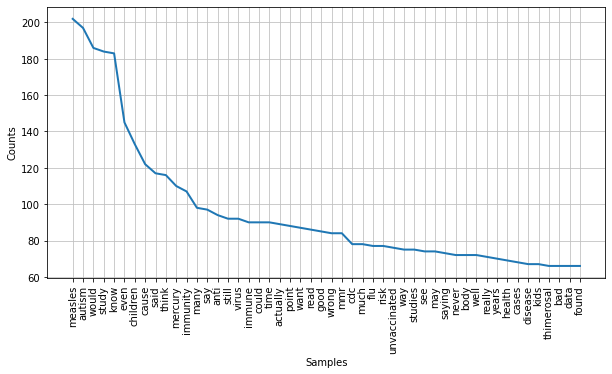

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
from matplotlib.pyplot import figure

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(50)

(-0.5, 799.5, 399.5, -0.5)

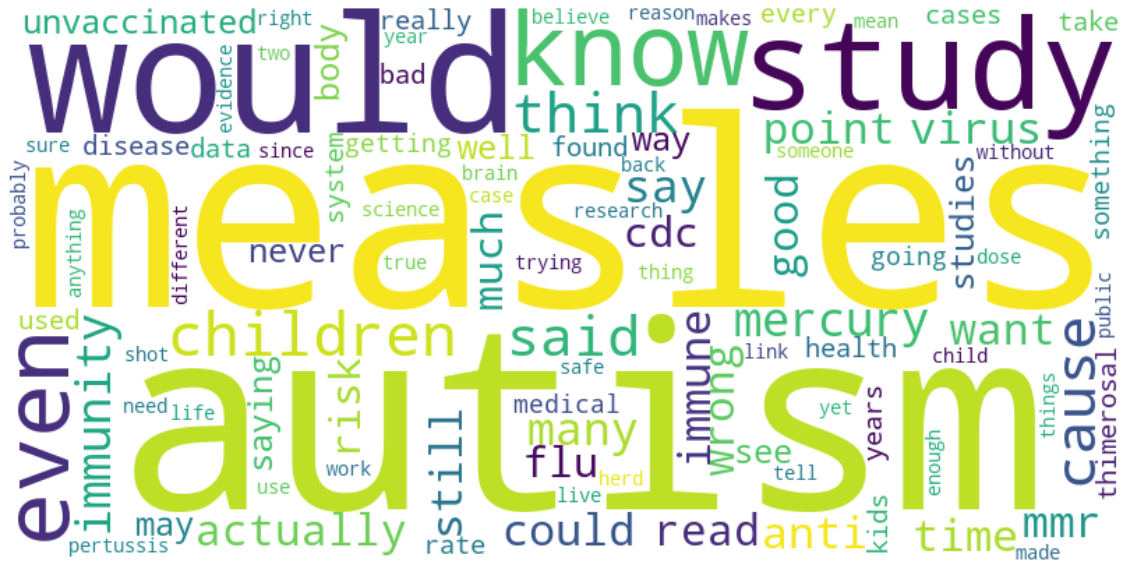

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

plt.figure(figsize=(20,15))
map_cloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate_from_frequencies(freqdist)
plt.imshow(map_cloud, interpolation='bilinear')
map_cloud.to_file('cloudmap_popular_terms' + '.png')
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

Se realiza el mismo procedimiento para los datos de "comentarios":

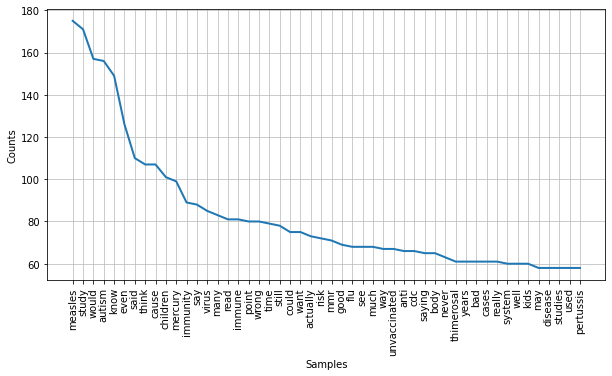

(-0.5, 799.5, 399.5, -0.5)

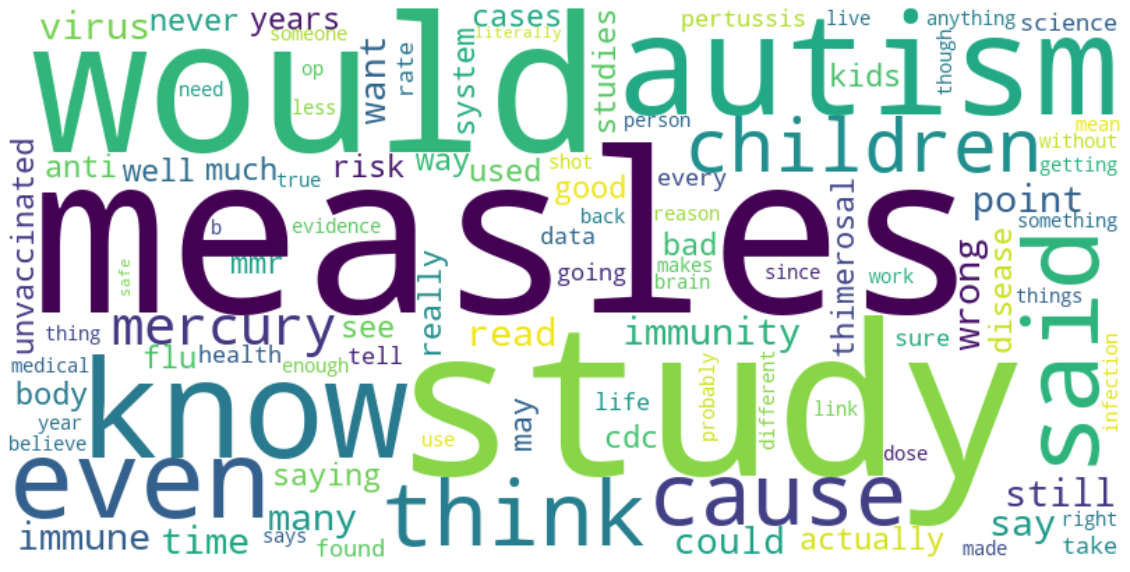

In [55]:
data = codecs.open("comments.txt", 'r', 'utf-8')

soup = BeautifulSoup(data)
text = soup.get_text()

text = re.sub(r"https?://\S+", "", text)
text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)

tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)

words = [word.lower() for word in tokens]
words_ns = [word for word in words if word not in sw]
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)
# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(50)

plt.figure(figsize=(20,15))
map_cloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate_from_frequencies(freqdist)
plt.imshow(map_cloud, interpolation='bilinear')
map_cloud.to_file('cloudmap_popular_terms_comments' + '.png')
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

Se realiza el mismo procedimiento para los datos de "publicaciones":

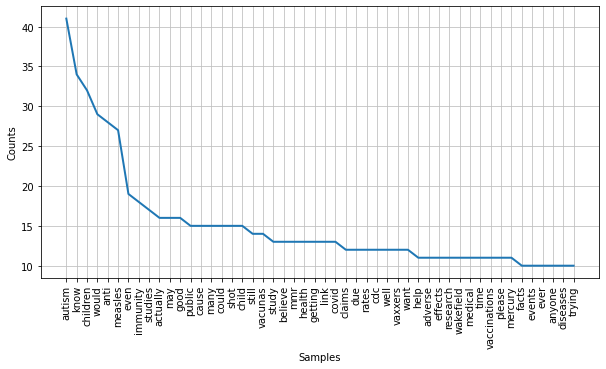

(-0.5, 799.5, 399.5, -0.5)

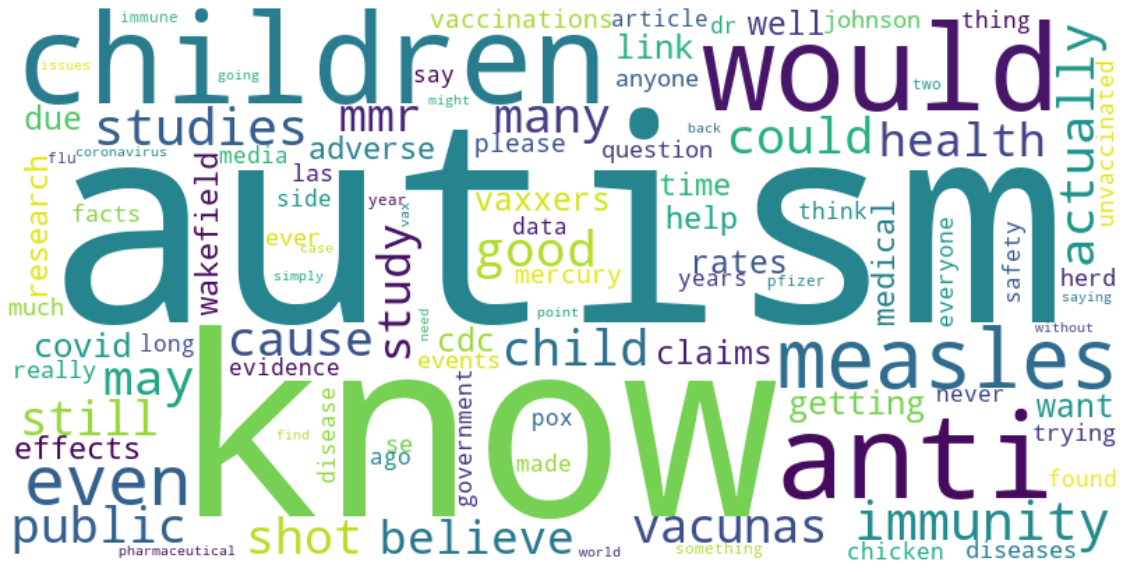

In [56]:
data = codecs.open("posts.txt", 'r', 'utf-8')

soup = BeautifulSoup(data)
text = soup.get_text()

text = re.sub(r"https?://\S+", "", text)
text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)

tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(text)

words = [word.lower() for word in tokens]
words_ns = [word for word in words if word not in sw]
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)
# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(50)

plt.figure(figsize=(20,15))
map_cloud = WordCloud(width=800, height=400, background_color='white',max_words=100).generate_from_frequencies(freqdist)
plt.imshow(map_cloud, interpolation='bilinear')
map_cloud.to_file('cloudmap_popular_terms_posts' + '.png')
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')